In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.dates import DateFormatter, WeekdayLocator , MonthLocator

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # 禁用換行

inbody_df = pd.read_csv('inbody.csv')
inbody_df = inbody_df.drop(columns=['Visceral_Fat','BMI'])


In [19]:
#檢查離奇數值
col_filter = 'Muscle_Mass'
std_range = 3
std_value = inbody_df[col_filter].std()
mean_value = inbody_df[col_filter].mean()
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)

inbody_df.loc[errorData.index,col_filter] = None
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)


      Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage
187  11/12    62.5         17.4      13.6                 21.7
Empty DataFrame
Columns: [Date, Weight, Muscle_Mass, Body_Fat, Body_Fat_Percentage]
Index: []


In [20]:


inbody_df2 = inbody_df.interpolate(method='linear', axis=0)#內插資訊
inbody_df = inbody_df2
print(inbody_df.head(30))

     Date     Weight  Muscle_Mass   Body_Fat  Body_Fat_Percentage
0   05/09  67.200000        28.50  16.100000               23.900
1   05/10  66.900000        28.30  16.400000               24.500
2   05/11  66.700000        27.90  16.900000               25.400
3   05/12  66.700000        28.70  15.600000               23.400
4   05/13  67.250000        28.40  16.700000               24.800
5   05/14  67.800000        28.10  17.800000               26.200
6   05/15  67.300000        28.90  15.800000               23.500
7   05/16  67.000000        28.35  16.450000               24.600
8   05/17  66.700000        27.80  17.100000               25.700
9   05/18  67.300000        29.20  15.400000               22.900
10  05/19  67.300000        29.00  15.700000               23.325
11  05/20  67.300000        28.80  16.000000               23.750
12  05/21  67.300000        28.60  16.300000               24.175
13  05/22  67.300000        28.40  16.600000               24.600
14  05/23 

C:\Users\Tim\AppData\Local\Temp\ipykernel_20028\1311206743.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inbody_df2 = inbody_df.interpolate(method='linear', axis=0)#內插資訊


In [21]:
#正規化
def normalize_dataframe(df, col):
    to_normalize = scaler.fit_transform(df[[col]]) 
    df[col] = to_normalize

scaler = MinMaxScaler()

normalize = inbody_df

normalize_dataframe(normalize,'Weight')
normalize_dataframe(normalize,'Muscle_Mass')
normalize_dataframe(normalize,'Body_Fat')
normalize_dataframe(normalize,'Body_Fat_Percentage')

print(normalize)


      Date    Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage
0    05/09  0.900000     0.758621  0.689189             0.636364
1    05/10  0.850000     0.689655  0.729730             0.696970
2    05/11  0.816667     0.551724  0.797297             0.787879
3    05/12  0.816667     0.827586  0.621622             0.585859
4    05/13  0.908333     0.724138  0.770270             0.727273
..     ...       ...          ...       ...                  ...
216  12/11  0.116667     0.482759  0.270270             0.323232
217  12/12  0.116667     0.482759  0.270270             0.323232
218  12/13  0.116667     0.482759  0.270270             0.323232
219  12/14  0.116667     0.482759  0.270270             0.323232
220  12/15  0.116667     0.482759  0.270270             0.323232

[221 rows x 5 columns]


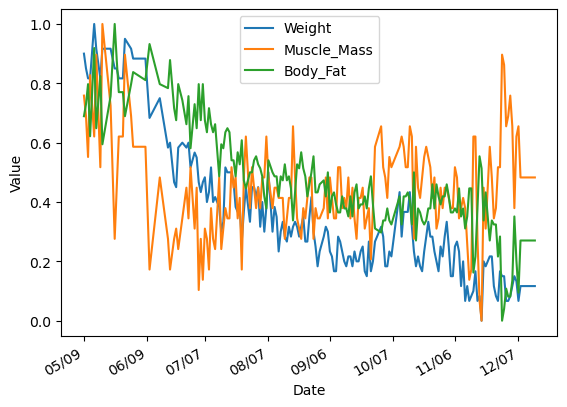

In [22]:


fig, ax = plt.subplots()
#inbody_df['Date'] = pd.to_datetime(inbody_df['Date'])
#inbody_df['Date'] = inbody_df['Date'].apply(lambda x: x.replace(year=2023))
x = inbody_df["Date"]

# 设置 x 轴主刻度为每周
ax.xaxis.set_major_locator(MonthLocator())

def scatter_by_label(df,col_x,col_y):
    plt.scatter(df[col_x],df[col_y],label=col_y)

def plot_by_label(df,col_x,col_y):
    plt.plot(df[col_x],df[col_y],label=col_y)

plot_by_label(normalize,'Date','Weight')
plot_by_label(normalize,'Date','Muscle_Mass')
plot_by_label(normalize,'Date','Body_Fat')
#plot_by_label('Body_Fat_Percentage')
#plot_by_label('BMI')
#plot_by_label('Visceral_Fat')

# 添加图例
ax.legend()

# 添加 x 轴和 y 轴标签
plt.xlabel("Date")
plt.ylabel("Value")

# 自动调整日期标签以防止重叠
fig.autofmt_xdate()

# 显示图形
plt.show()


In [28]:
train_df = pd.read_csv('Train.csv')

pr_keys = ['Squat_PR','Deadlift_PR','Sumo_PR','Bench_Press_PR','Pull_Up_PR']


for pr_key in pr_keys:
    #內插資訊
    train_df[pr_key] = train_df[pr_key].interpolate(method='linear', axis=0)
    #補開頭
    train_df[pr_key].fillna(train_df[pr_key].ffill().bfill(), inplace=True)

print("---")
print(train_df.head(30))

#print("---")
#print(train_df.head(30))

train_df['Total_Volume'] = train_df[['Chest_Total_Volume', 'Back_Total_Volume', 'Legs_Total_Total']].sum(axis=1)

#將訓練容量分散到七天內
def dispersion_Volume (col) :
    for i in range(len(train_df)) :
        val = train_df.loc[i, col] / 7
        if val <= 0 or pd.isna(val):
            continue
        train_df.loc[i, col] = 0
        for j in range(-3,3) :
            setIdx = i+j
            if setIdx < 0 or setIdx >= len(train_df) :
                continue
            if (pd.isna(train_df.loc[setIdx, col])):
                train_df.loc[setIdx, col] = 0
            train_df.loc[setIdx, col] += val

dispersion_Volume('Chest_Total_Volume')
dispersion_Volume('Back_Total_Volume')
dispersion_Volume('Legs_Total_Total')
dispersion_Volume('Total_Volume')

# #將訓練容量分散到七天內
# for i in range(len(train_df)) :
#     val = train_df.loc[i, 'Chest_Total_Volume'] / 7
#     if val <= 0 or pd.isna(val):
#         continue
#     train_df.loc[i, 'Chest_Total_Volume'] = 0
#     for j in range(-3,3) :
#         setIdx = i+j
#         if setIdx < 0 or setIdx >= len(train_df) :
#             continue
#         if (pd.isna(train_df.loc[setIdx, 'Chest_Total_Volume'])):
#             train_df.loc[setIdx, 'Chest_Total_Volume'] = 0
#         train_df.loc[setIdx, 'Chest_Total_Volume'] += val
        
        #print(setIdx,"=",newV , "train_df.loc[setIdx, 'Chest_Total_Volume']=",train_df.loc[setIdx, 'Chest_Total_Volume'])
      
            

print("---")
print(train_df.head(30))




---
     Date    Squat_PR  Deadlift_PR     Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total
0   05/01  127.000000        74.00   90.000000            72.0   81.000000                 NaN                NaN            7400.0
1   05/02  127.000000        74.00   90.000000            72.0   81.000000              6175.0                NaN               NaN
2   05/03  127.000000        74.00   90.000000            74.8   81.000000                 NaN             6066.0               NaN
3   05/04  127.000000        74.00   90.000000            77.6   81.300000                 NaN                NaN               NaN
4   05/05  127.000000        74.00   90.000000            80.4   81.600000                 NaN                NaN               NaN
5   05/06  127.000000        74.00   90.000000            83.2   81.900000                 NaN                NaN            7780.0
6   05/07  124.900000        74.00   90.000000            86.0   82.2000

<bound method NDFrame.keys of       Date  Squat_PR  Deadlift_PR  Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
0    05/01     127.0    74.000000      NaN             NaN         NaN         1152.186589         990.367347       1426.988755   3569.542691
1    05/02     127.0    74.000000      NaN            72.0         NaN         1190.764265        1131.848397        401.106682   2723.719343
2    05/03     127.0    74.000000      NaN            74.8        81.0          334.707265        1169.745106       1372.585062   2877.037433
3    05/04     127.0    74.000000      NaN            77.6        81.3         1253.638790         328.799072       1364.813106   2947.250968
4    05/05     127.0    74.000000      NaN            80.4        81.6         1262.620865         214.077740       1502.485453   2979.184057
..     ...       ...          ...      ...             ...         ...                 ...                ...         

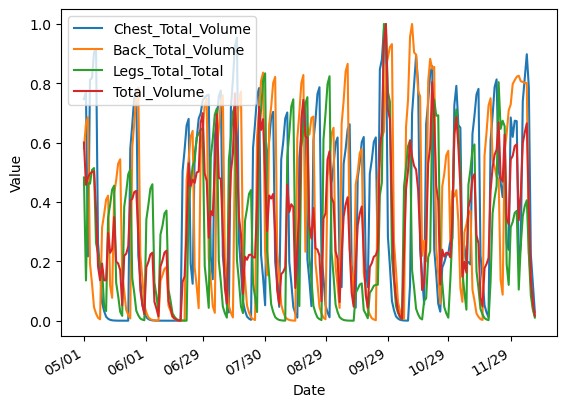

In [24]:
fig, ax = plt.subplots()
x = train_df["Date"]
print(train_df.keys)

normalize_train_df = train_df

for col in normalize_train_df.columns:
    if(col != 'Date'):  
        normalize_dataframe(normalize_train_df,col)

# normalize_dataframe(normalize_train_df,'Squat_PR')
# normalize_dataframe(normalize_train_df,'Deadlift_PR')
# normalize_dataframe(normalize_train_df,'Sumo_PR')
# normalize_dataframe(normalize_train_df,'Bench_Press_PR')
# normalize_dataframe(normalize_train_df,'Pull_Up_PR')
# normalize_dataframe(normalize_train_df,'Chest_Total_Volume')
# normalize_dataframe(normalize_train_df,'Back_Total_Volume')
# normalize_dataframe(normalize_train_df,'Legs_Total_Total')
# normalize_dataframe(normalize_train_df,'Total_Volume')

# 设置 x 轴主刻度为每周
ax.xaxis.set_major_locator(MonthLocator())

plot_by_label(train_df,'Date','Chest_Total_Volume')
plot_by_label(train_df,'Date','Back_Total_Volume')
plot_by_label(train_df,'Date','Legs_Total_Total')
plot_by_label(train_df,'Date','Total_Volume')

# 添加图例
ax.legend()

# 添加 x 轴和 y 轴标签
plt.xlabel("Date")
plt.ylabel("Value")

# 自动调整日期标签以防止重叠
fig.autofmt_xdate()

# 显示图形
plt.show()


In [25]:
#訓練體重要到達X公斤 需要多久 & 體脂肪 & 肌肉量 & PR 會是多少?
#訓練量 用2周為單位統計
#加上之前INBODY資料&訓練資料

# 创建 PairGrid，使用 'Date' 列来表示颜色
#g = sns.PairGrid(train_df,hue='Date')
#g.map(plt.scatter)



     Date    Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage  Squat_PR  Deadlift_PR   Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
8   05/09  0.900000     0.758621  0.689189             0.636364     0.700     0.000000       NaN             1.0    0.050000            0.168142           0.004798          0.185763      0.136906
9   05/10  0.850000     0.689655  0.729730             0.696970     0.600     0.000000       NaN             1.0    0.058333            0.061177           0.314079          0.174872      0.192516
10  05/11  0.816667     0.551724  0.797297             0.787879     0.500     0.012295       NaN             1.0    0.066667            0.032760           0.357537          0.051482      0.136175
11  05/12  0.816667     0.827586  0.621622             0.585859     0.400     0.024590       NaN             1.0    0.075000            0.013420           0.407929          0.032299      0.136071
12  05/13  0.908333 

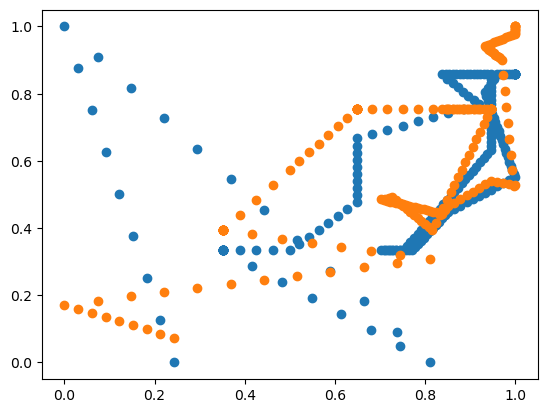

In [26]:
combine_df = pd.merge(inbody_df,train_df,on='Date',how='outer')
combine_df = combine_df.sort_values(by='Date').reset_index(drop=True)
combine_df = combine_df.iloc[8:]
print(combine_df.head(10))




scatter_by_label(combine_df,'Sumo_PR','Squat_PR')
scatter_by_label(combine_df,'Sumo_PR','Deadlift_PR')
#scatter_by_label(combine_df,'Sumo_PR','Bench_Press_PR')
#scatter_by_label(combine_df,'Sumo_PR','Pull_Up_PR')

#print(combine_df)
#g = sns.PairGrid(combine_df,vars=['Muscle_Mass','Squat_PR'])
#g.map(plt.scatter)

#g = sns.PairGrid(combine_df,vars=['Muscle_Mass','Deadlift_PR'])
#g.map(plt.scatter)

#g = sns.PairGrid(combine_df)
#g.map_offdiag(plt.scatter)
#g.map_diag(plt.hist)